In [54]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-email-dataset/fraud_email_.csv


# Import NLTP module 

In [49]:
!pip install nltp
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltp import Preprocessor

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Analysis Data

In [55]:
df = pd.read_csv('../input/fraud-email-dataset/fraud_email_.csv')
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


# Number of character in Dataset

In [56]:
df.shape

(11929, 2)

# Number of values each Class

In [57]:
df['Class'].value_counts()

Class
0    6742
1    5187
Name: count, dtype: int64

# Count of null value each Class

In [58]:
df.isnull().sum()

Text     1
Class    0
dtype: int64

# Drop null value 

In [59]:
df.dropna(inplace=True)
df.isnull().sum()

Text     0
Class    0
dtype: int64

# Visaulization of Data

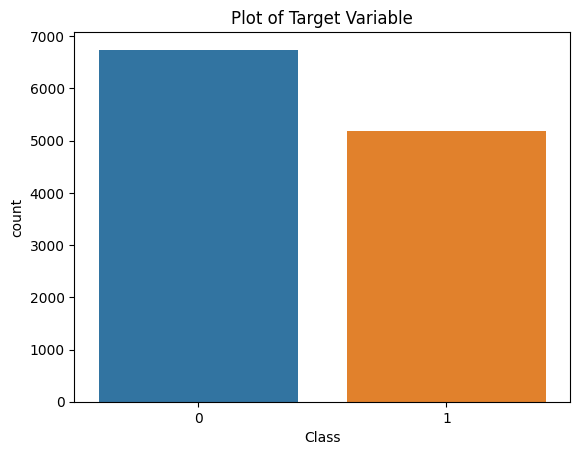

In [60]:
sns.countplot(x=df['Class'])
plt.title("Plot of Target Variable")
plt.show()

# Remove HTML each value

In [61]:
df['Text']=df['Text'].apply(lambda s : BeautifulSoup(s).text)
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


# Remove Stop Word

In [62]:
pre=Preprocessor(df['Text']).text_cleaner()

Cleaning Complete
Time Taken: 8.339 seconds


# Visualize of popular character

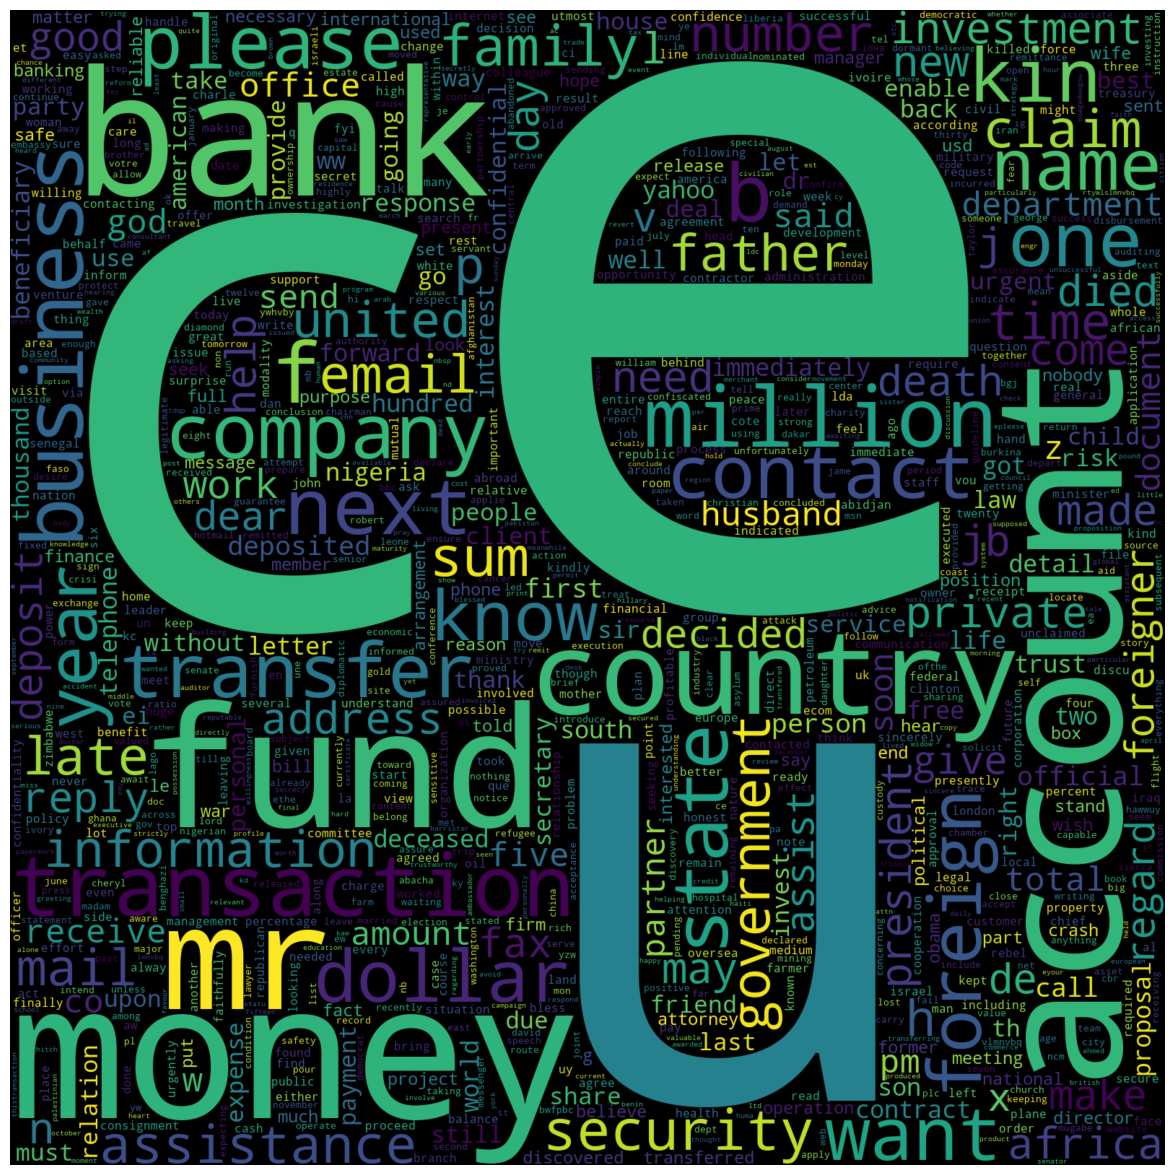

In [63]:
words = pre
plt.figure(figsize = (15,15))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 1600,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()


> The more important keywords,the more larger character.

In [65]:
X=pre
Y=df['Class']

# Import Algrithms

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Number of data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
print(f'X_Train: {len(X_train)}\nX_Test: {len(X_test)}\ny_Train: {len(y_train)}\ny_Test: {len(y_test)}')

X_Train: 9542
X_Test: 2386
y_Train: 9542
y_Test: 2386


# Create function for training model using TF_IDF

In [67]:
def fit_predict(model):   
    clf = Pipeline([('tfidf',TfidfVectorizer()),
                   ('clf',model)])

    clf.fit(X_train, y_train)
    print()
    
    # Evaluate model
    Score = clf.score(X_test,y_test)
    print(f'Score: {Score*100}') 
    return clf

# Class for display confusion matrix 

In [72]:
class Metrics():
    
    def __init__(self, pred):
        self.pred = pred
        
    def cm(self):
        cm = confusion_matrix(y_test, self.pred)
        labels = ['Not Spam','Spam']

        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm,annot =True, linewidth=.6, linecolor="r", fmt=".0f", ax = ax)

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
        plt.show()

    def report(self):
        class_report = classification_report(y_test, self.pred)
        print(class_report)

# Logictic Regression 

In [73]:
LR_model = fit_predict(LogisticRegression())

LR_pred = LR_model.predict(X_test)


Score: 98.23973176865046


Confusion Matrix for Logictics Regression

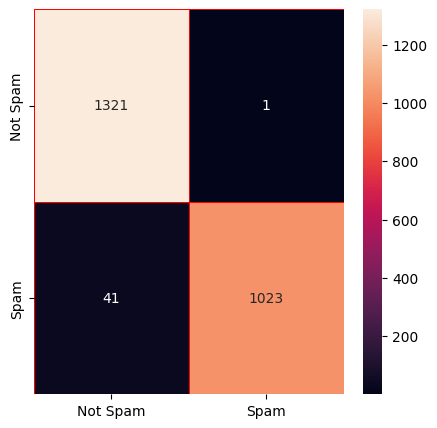

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       1.00      0.96      0.98      1064

    accuracy                           0.98      2386
   macro avg       0.98      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386



In [74]:
Metrics(LR_pred).cm()

Metrics(LR_pred).report()

Result: The model identified 41 phishing emails as non-spam and 1 non-spam emails as phishing.

# Linear SVC

In [75]:
SVC_model = fit_predict(LinearSVC())

SVC_pred = SVC_model.predict(X_test)


Score: 99.07795473595976


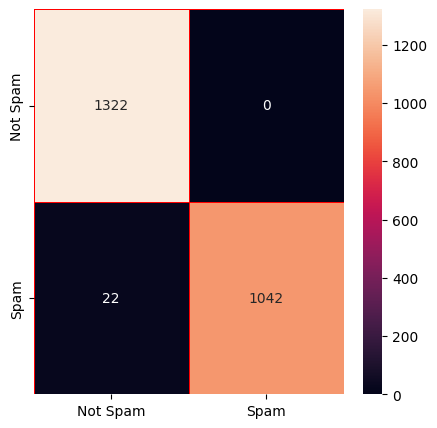

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1322
           1       1.00      0.98      0.99      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.99      0.99      2386
weighted avg       0.99      0.99      0.99      2386



In [76]:
Metrics(SVC_pred).cm()

Metrics(SVC_pred).report()

Result: The model identified 22 phishing emails as non-spam and 0 non-spam emails as phishing.

# Naive Bayes

In [77]:
NB_model = fit_predict(BernoulliNB())

NB_pred = NB_model.predict(X_test)


Score: 91.99497066219614


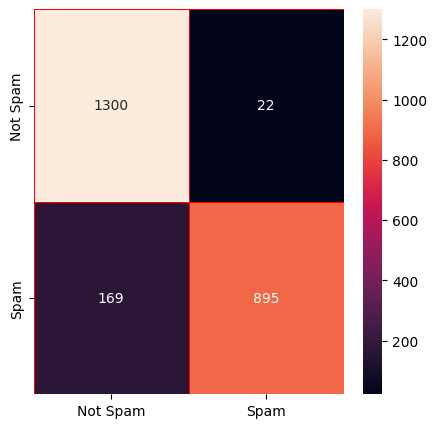

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1322
           1       0.98      0.84      0.90      1064

    accuracy                           0.92      2386
   macro avg       0.93      0.91      0.92      2386
weighted avg       0.93      0.92      0.92      2386



In [78]:
Metrics(NB_pred).cm()

Metrics(NB_pred).report()

Result: The model identified 169 phishing emails as non-spam and 22 non-spam emails as phishing.

# Decision Tree

In [80]:
DT_Model = fit_predict(DecisionTreeClassifier())
DT_pred = DT_Model.predict(X_test)


Score: 97.61106454316848


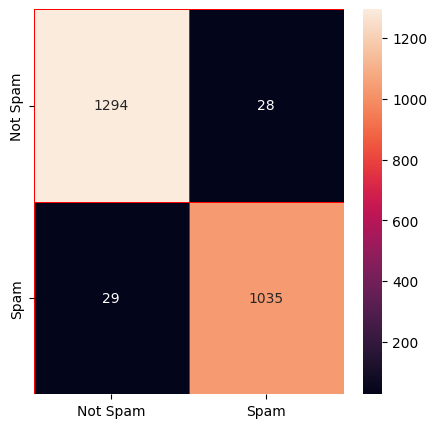

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1322
           1       0.97      0.97      0.97      1064

    accuracy                           0.98      2386
   macro avg       0.98      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386



In [81]:
Metrics(DT_pred).cm()

Metrics(DT_pred).report()

Result: The model identified 29 phishing emails as non-spam and 28 non-spam emails as phishing.

# Knearest Neighbors

In [86]:
KNN_model = fit_predict(KNeighborsClassifier())
KNN_pred = KNN_model.predict(X_test)


Score: 72.92539815590948


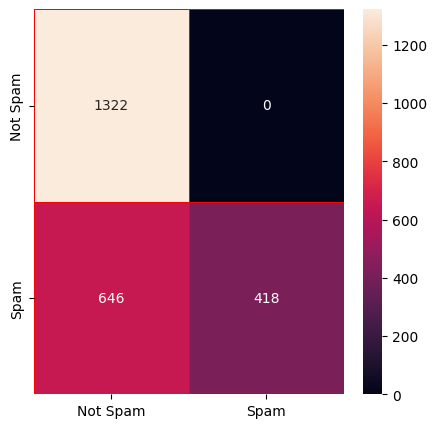

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1322
           1       1.00      0.39      0.56      1064

    accuracy                           0.73      2386
   macro avg       0.84      0.70      0.68      2386
weighted avg       0.82      0.73      0.70      2386



In [88]:
Metrics(KNN_pred).cm()

Metrics(KNN_pred).report()

Result: The model identified 646 phishing emails as non-spam and 0 non-spam emails as phishing.

# SVM  : Support Vector Machine 

In [89]:
SVM_model = fit_predict(SVC())
SVM_pred = SVM_model.predict(X_test)


Score: 98.61693210393965


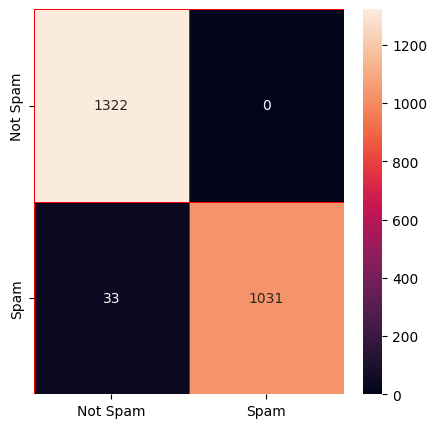

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1322
           1       1.00      0.97      0.98      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.98      0.99      2386
weighted avg       0.99      0.99      0.99      2386



In [91]:
Metrics(SVM_pred).cm()

Metrics(SVM_pred).report()

Result: The model identified 33 phishing emails as non-spam and 0 non-spam emails as phishing.

# Nerual Network

In [92]:
NN_Model = fit_predict(MLPClassifier(max_iter=100, random_state=42))
NN_pred = NN_Model.predict(X_test)


Score: 98.99413243922884


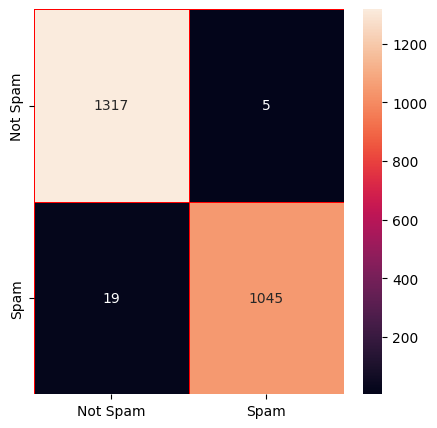

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1322
           1       1.00      0.98      0.99      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.99      0.99      2386
weighted avg       0.99      0.99      0.99      2386



In [95]:
Metrics(NN_pred).cm()

Metrics(NN_pred).report()

Result: The model identified 19 phishing emails as non-spam and 5 non-spam emails as phishing.